In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [3]:
df = pd.read_csv('data/df_out.csv')
print(df.shape)
df.head()

(9902, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


## Data Preparation

### Избавимся от дублей и "пустых" полей 

In [805]:
df = df.drop_duplicates()


In [806]:
def missing_values(df):
    missing_values = round(((df.isna().sum() / len(df)) * 100).sort_values(),2)
    print('Процент пропущенных значений')
    print(missing_values)

In [807]:
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов', len(df.dropna()))
    print('Процент полностью заполненных объектов', round(len(df.dropna()) * 100 / len(df), 2))

print_useful_rows_info(df)

Количество полностью заполненных объектов 9507
Процент полностью заполненных объектов 95.07


Строк, имеющих незаполненные поля всего 5%. Их можно просто удалить. 

In [808]:
df_old = df
df[df['image_url'].isna()]


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


In [809]:
df = df.dropna(thresh=15)
print_useful_rows_info(df)
# удаляем строки, содержащие 5 и более незаполненных полей

Количество полностью заполненных объектов 9507
Процент полностью заполненных объектов 95.09


In [810]:
missing_values(df)

Процент пропущенных значений
id                0.00
posting_date      0.00
state             0.00
description       0.00
image_url         0.00
price_category    0.00
odometer          0.00
price             0.00
region_url        0.00
region            0.00
url               0.00
manufacturer      0.00
date              0.00
year              0.34
transmission      0.43
fuel              0.61
lat               0.96
long              0.96
model             1.26
title_status      1.64
dtype: float64


<Axes: >

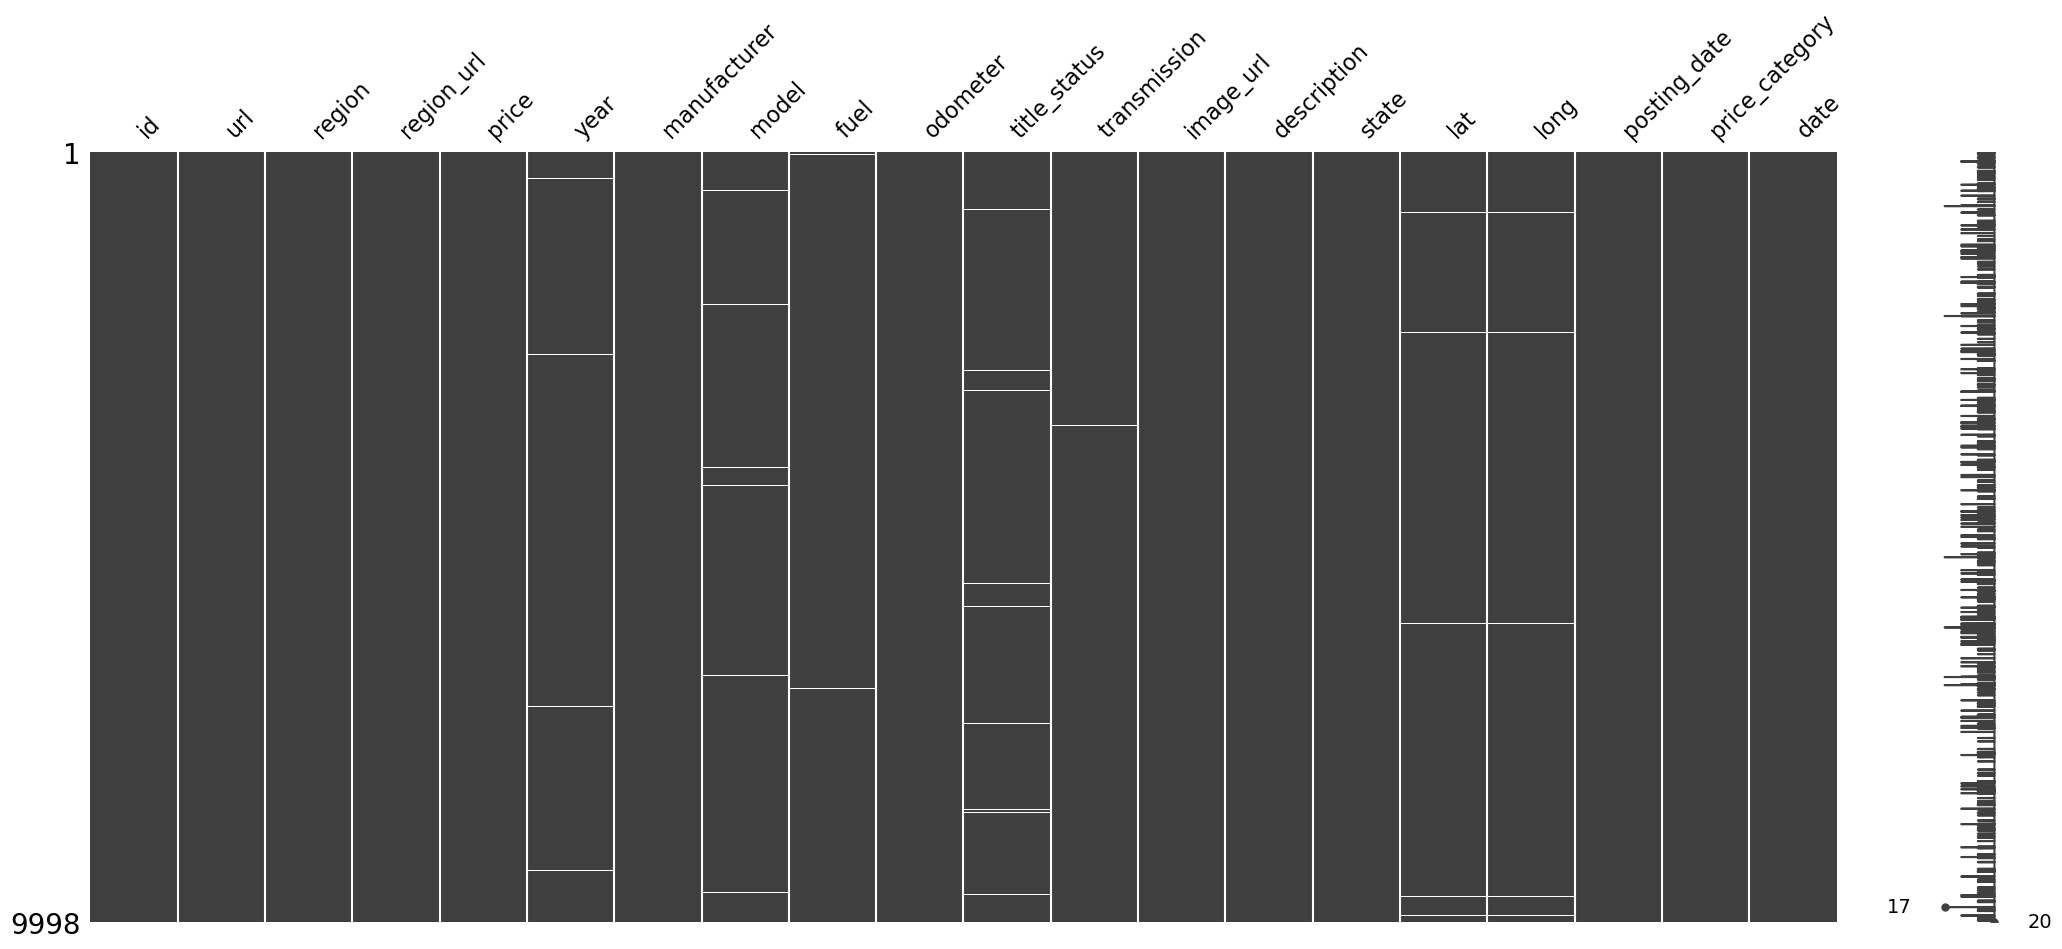

In [811]:
import missingno as msno
msno.matrix(df)

In [812]:
df = df.dropna()
print_useful_rows_info(df)

Количество полностью заполненных объектов 9507
Процент полностью заполненных объектов 100.0


### Преобразование типов данных

In [813]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9507 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9507 non-null   int64  
 1   url             9507 non-null   object 
 2   region          9507 non-null   object 
 3   region_url      9507 non-null   object 
 4   price           9507 non-null   int64  
 5   year            9507 non-null   float64
 6   manufacturer    9507 non-null   object 
 7   model           9507 non-null   object 
 8   fuel            9507 non-null   object 
 9   odometer        9507 non-null   int64  
 10  title_status    9507 non-null   object 
 11  transmission    9507 non-null   object 
 12  image_url       9507 non-null   object 
 13  description     9507 non-null   object 
 14  state           9507 non-null   object 
 15  lat             9507 non-null   float64
 16  long            9507 non-null   float64
 17  posting_date    9507 non-null   object

In [814]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,35.970000,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00


In [815]:
df_type = df.copy()

Преобразуем тип поля "year" в int

In [816]:
df_type['year'] = df_type['year'].astype(int)

In [817]:
df_type['year'].dtype

dtype('int32')

Поле "posting_date" имеет тип "object" Преобразуем его в тип "datetime"

In [818]:
df_type['posting_date'].values.tolist()[1]

'2021-04-28T03:52:20-0700'

In [819]:
pd.to_datetime(df_type['posting_date'], utc=True)

0      2021-04-17 16:30:50+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-05-03 22:32:06+00:00
5      2021-04-08 19:10:56+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: posting_date, Length: 9507, dtype: datetime64[ns, UTC]

Старую колонку оставим в текстовом формате, а под правильный тип создадим колонку date.

In [820]:
df_type['date'] = pd.to_datetime(df_type['posting_date'], utc=True)

In [821]:
df_type['date']

0      2021-04-17 16:30:50+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
4      2021-05-03 22:32:06+00:00
5      2021-04-08 19:10:56+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: date, Length: 9507, dtype: datetime64[ns, UTC]

In [822]:
df_type['date'][0].year

2021

In [823]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9507 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9507 non-null   int64              
 1   url             9507 non-null   object             
 2   region          9507 non-null   object             
 3   region_url      9507 non-null   object             
 4   price           9507 non-null   int64              
 5   year            9507 non-null   int32              
 6   manufacturer    9507 non-null   object             
 7   model           9507 non-null   object             
 8   fuel            9507 non-null   object             
 9   odometer        9507 non-null   int64              
 10  title_status    9507 non-null   object             
 11  transmission    9507 non-null   object             
 12  image_url       9507 non-null   object             
 13  description     9507 non-null   object

### Проверка данных на аномалии

In [824]:
df_type.describe()

,id,price,year,odometer,lat,long
count,9.507000e+03,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000
mean,7.311560e+09,19382.554644,2011.023877,93570.814768,38.592927,-93.957723
std,4.368563e+06,18328.499851,9.466994,63242.739535,5.837483,18.028733
min,7.301586e+09,500.000000,1915.000000,0.000000,-67.144243,-158.069300
25%,7.308186e+09,7836.500000,2008.000000,39244.000000,34.874932,-107.978513
50%,7.312782e+09,15900.000000,2013.000000,89000.000000,39.290100,-87.960000
75%,7.315292e+09,27990.000000,2017.000000,137054.500000,42.417300,-80.719038
max,7.317090e+09,1000000.000000,2022.000000,283466.000000,64.947500,173.885502


напишим функцию для расчета выбрасов по правилам 3 сигм 

In [825]:
def calculate_outliers_3sigma(df):
    #stat = df.describe().values
    (left, write) = (round(df.mean() - df.std() * 3), round(df.mean() + df.std() * 3))
    return(left, write)


In [826]:
calculate_outliers_3sigma(df.price)

(-35603, 74368)

есть выбросы для верхней границы цены автомобиля

In [827]:
df_type[df_type['price'] > calculate_outliers_3sigma(df.price)[1]].sort_values(by='price').tail(15)
# 15 самых дорогих авто. 

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
2087,7315309821,https://nh.craigslist.org/ctd/d/methuen-2004-r...,new hampshire,https://nh.craigslist.org,109995,2004,other,ROLLS ROYCE PHANTOM,gas,26000,clean,automatic,https://images.craigslist.org/00a0a_aF4tYDmAxB...,2004 Rolls-Royce Phantom Base 4dr Sedan Of...,nh,42.756205,-71.210258,2021-05-01T11:25:28-0400,high,2021-05-01 15:25:28+00:00
4469,7308293412,https://kalispell.craigslist.org/cto/d/columbi...,kalispell,https://kalispell.craigslist.org,119966,1966,chevrolet,corvette sting ray,gas,56455,clean,manual,https://images.craigslist.org/00000_4T3r43W3Fu...,DO NOT NEED HELP SELLING – DON’T ASK! Selling...,mt,48.404000,-114.350900,2021-04-17T10:28:02-0600,high,2021-04-17 16:28:02+00:00
4133,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,35.081800,-106.648200,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1699,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1963,other,cadvwrambuick,gas,283466,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,46.735200,-117.172900,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9194,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,38.025845,-87.596457,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
3006,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,30.122300,-81.362700,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5149,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,42.756205,-71.210258,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6566,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,28.463700,-81.394800,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
9024,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,32.790400,-96.804400,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4245,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,45.382346,-122.605132,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00


In [828]:
df_type[df_type['price'] > calculate_outliers_3sigma(df_type.price)[1]]['id'].count()
# всего 56 выбрасов

56

In [829]:
from matplotlib import pyplot as plt

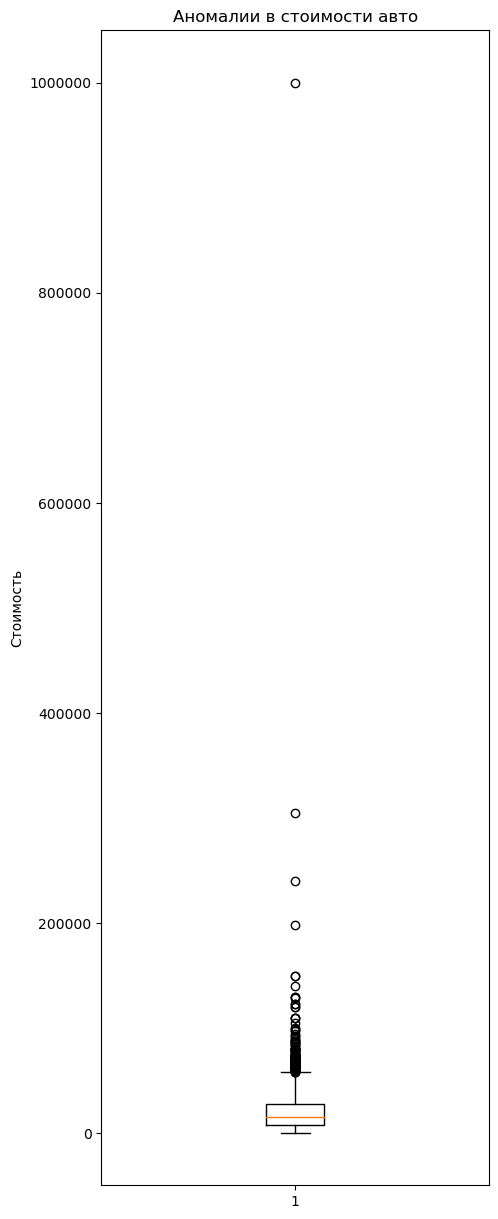

In [830]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(5,15))
#plt.figure(figsize=(5,15))
ax.boxplot(df['price'])
ax.set_ylabel('Стоимость')
ax.set_title('Аномалии в стоимости авто')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Авто за $1000000 это явно ошибка в данных. Возможно, что модели от Porsche и Ferrari действительно стоят тех денег, но их в выборке не много. Поэтому, удалим их и будем обучать модель на массовом сегменте.

In [831]:
df_anoamalya = df_type.copy()

In [832]:
df_anoamalya = df_type[df_type['price'] < calculate_outliers_3sigma(df_type.price)[1]]

In [833]:
df_anoamalya.sort_values(by='price')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
9702,7306035112,https://palmsprings.craigslist.org/ctd/d/jurup...,palm springs,https://palmsprings.craigslist.org,500,2013,nissan,altima,gas,130000,salvage,automatic,https://images.craigslist.org/00z0z_cOLzInlBVQ...,Call* 909 333 8413 Or 323 713 7682 Follow us o...,ca,34.003300,-117.445000,2021-04-12T23:04:05-0700,low,2021-04-13 06:04:05+00:00
8240,7312874623,https://desmoines.craigslist.org/cto/d/des-moi...,des moines,https://desmoines.craigslist.org,500,2006,jeep,grand cherokee,gas,150000,clean,manual,https://images.craigslist.org/00z0z_cT6FWo2FUe...,RUNS DRIVES SHIFTS BRAKES AN STEERS EXCELLENT ...,ia,41.638100,-93.620300,2021-04-26T11:54:48-0500,low,2021-04-26 16:54:48+00:00
4017,7314837103,https://cleveland.craigslist.org/ctd/d/clevela...,cleveland,https://cleveland.craigslist.org,500,2014,chevrolet,malibu,gas,10000,clean,automatic,https://images.craigslist.org/00808_69FzBuYFb6...,📣 SPECIAL EVENT 📣 We will be having our first...,oh,41.463159,-81.646343,2021-04-30T11:54:05-0400,low,2021-04-30 15:54:05+00:00
6455,7302068140,https://cleveland.craigslist.org/ctd/d/clevela...,cleveland,https://cleveland.craigslist.org,500,2014,chevrolet,malibu,gas,10000,clean,automatic,https://images.craigslist.org/00808_69FzBuYFb6...,📣 SPECIAL EVENT 📣 We will be having our first...,oh,41.463159,-81.646343,2021-04-05T11:19:54-0400,low,2021-04-05 15:19:54+00:00
1194,7316794885,https://minneapolis.craigslist.org/ank/ctd/d/l...,minneapolis / st paul,https://minneapolis.craigslist.org,500,2004,chevrolet,equinox,gas,100000,clean,automatic,https://images.craigslist.org/00W0W_l1R4dela7J...,Updated 5-03-21 *THE FOLLOWING LIST OF CARS A...,mn,45.925259,-94.346037,2021-05-04T12:01:14-0500,low,2021-05-04 17:01:14+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,7307033814,https://elpaso.craigslist.org/ctd/d/tempe-2020...,el paso,https://elpaso.craigslist.org,72995,2020,ram,"2500 6"" lifted laramie crew 4x4",diesel,23403,clean,automatic,https://images.craigslist.org/00X0X_gKWGgS8XlA...,"2020 Ram 2500 6"" LIFTED LARAMIE CREW 4X4 Truck...",tx,33.391700,-111.924900,2021-04-14T21:01:34-0600,high,2021-04-15 03:01:34+00:00
6243,7314495756,https://spokane.craigslist.org/ctd/d/greenacre...,spokane / coeur d'alene,https://spokane.craigslist.org,72998,2016,gmc,sierra 2500 denali,diesel,39593,clean,automatic,https://images.craigslist.org/00s0s_hTl7Jkky3n...,2016 GMC Sierra 2500 Denali Truck1 OWNER 2016 ...,id,47.658400,-117.156800,2021-04-29T13:12:36-0700,high,2021-04-29 20:12:36+00:00
2021,7304872057,https://kpr.craigslist.org/ctd/d/pasco-2019-ch...,kennewick-pasco-richland,https://kpr.craigslist.org,72999,2019,chevrolet,silverado deisel 3500,diesel,29987,clean,automatic,https://images.craigslist.org/01111_bHDiG8TiL4...,2019 Chevrolet Silverado 3500 HD LTZ Z71 4x4 *...,wa,46.234838,-119.128015,2021-04-10T13:26:04-0700,high,2021-04-10 20:26:04+00:00
6069,7316730427,https://killeen.craigslist.org/ctd/d/liberty-h...,killeen / temple / ft hood,https://killeen.craigslist.org,73995,2019,ford,f250 lariat 4x4 diesel,diesel,52378,clean,automatic,https://images.craigslist.org/00N0N_aFAWPeUISJ...,CALL OR TEXT 512-914-8066 www.GETADIESEL.com ...,tx,30.663000,-97.931600,2021-05-04T10:19:32-0500,high,2021-05-04 15:19:32+00:00


Записи с аномальными ценами удалены. Продолжим поиск аномалий.

In [834]:
df_anoamalya.describe()

,id,price,year,odometer,lat,long
count,9.451000e+03,9451.000000,9451.000000,9451.000000,9451.000000,9451.000000
mean,7.311558e+09,18791.327267,2011.009629,93929.389059,38.596392,-93.929857
std,4.369697e+06,13600.939771,9.438636,63067.606248,5.724239,17.795703
min,7.301586e+09,500.000000,1915.000000,0.000000,19.541726,-158.069300
25%,7.308183e+09,7797.000000,2008.000000,39656.000000,34.892100,-107.495450
50%,7.312782e+09,15590.000000,2013.000000,89307.000000,39.300000,-87.947800
75%,7.315292e+09,27990.000000,2017.000000,137516.500000,42.400679,-80.690000
max,7.317090e+09,74000.000000,2022.000000,283466.000000,64.947500,94.163200


In [835]:
# year
calculate_outliers_3sigma(df_anoamalya.year)

(1983, 2039)

Есть выбрасы на нижней границе.

In [836]:
df_anoamalya[df_anoamalya['year'] < calculate_outliers_3sigma(df_anoamalya.year)[0]].sort_values(by='year')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
401,7308847796,https://billings.craigslist.org/cto/d/columbus...,billings,https://billings.craigslist.org,5000,1915,ford,model t,gas,12345,clean,manual,https://images.craigslist.org/01616_88aseKpgub...,Things included New Rootlieb front and rear fe...,mt,45.626200,-109.257100,2021-04-18T12:20:03-0600,low,2021-04-18 18:20:03+00:00
6342,7314390836,https://kansascity.craigslist.org/ctd/d/odessa...,"kansas city, MO",https://kansascity.craigslist.org,14950,1923,ford,t-bucket,gas,15000,clean,automatic,https://images.craigslist.org/00E0E_kfyzxZlR3y...,1923 T bucket 550ci 700Hp BBC World product he...,ks,38.982900,-93.975700,2021-04-29T12:12:18-0500,medium,2021-04-29 17:12:18+00:00
5014,7313024973,https://prescott.craigslist.org/cto/d/cottonwo...,prescott,https://prescott.craigslist.org,18500,1927,chevrolet,coupe,gas,100,clean,manual,https://images.craigslist.org/00r0r_j4bp7r0piT...,"1927 Chevy Capitol A Coupe, all original, 2nd ...",az,34.571326,-112.104943,2021-04-26T13:52:28-0700,medium,2021-04-26 20:52:28+00:00
6476,7312752494,https://rochester.craigslist.org/cto/d/hilton-...,rochester,https://rochester.craigslist.org,45000,1928,ford,sport coupe,gas,2520,clean,automatic,https://images.craigslist.org/00q0q_gUJUnEwtJi...,"This 1928 Ford Model A Sport Coupe, was a 2008...",ny,43.273081,-77.795563,2021-04-26T09:39:22-0400,high,2021-04-26 13:39:22+00:00
6329,7316455114,https://tucson.craigslist.org/cto/d/tucson-192...,tucson,https://tucson.craigslist.org,7800,1928,other,1928 Crysler,gas,100,clean,automatic,https://images.craigslist.org/00B0B_1FiYNYzHas...,"Here for sale is a nice Rat Rod, the body is a...",az,32.188659,-110.769482,2021-05-03T14:52:05-0700,low,2021-05-03 21:52:05+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,7310994464,https://odessa.craigslist.org/cto/d/kermit-cj-...,odessa / midland,https://odessa.craigslist.org,18000,1981,jeep,cj8 scrambler,gas,100000,clean,manual,https://images.craigslist.org/00C0C_5M6O9m9wWB...,Cj8 Sbc 350 4x4 starts right up lots of new pa...,tx,31.855000,-103.091300,2021-04-22T14:15:07-0500,medium,2021-04-22 19:15:07+00:00
7195,7311978609,https://utica.craigslist.org/cto/d/yorkville-1...,utica-rome-oneida,https://utica.craigslist.org,12500,1981,chevrolet,corvette,gas,61300,clean,manual,https://images.craigslist.org/00404_byQQeo6QAo...,Up for sale is my 1981 Chevrolet Corvette. It ...,ny,43.111600,-75.275600,2021-04-24T14:18:17-0400,medium,2021-04-24 18:18:17+00:00
2628,7311865329,https://modesto.craigslist.org/cto/d/brea-1982...,modesto,https://modesto.craigslist.org,18500,1982,gmc,2500 pick up,gas,121000,clean,automatic,https://images.craigslist.org/00h0h_lDr8q6BOtN...,1982 GMC PICK UP 2500 - 2 WHEEL DRIVE 350 CHEV...,ca,33.929100,-117.884500,2021-04-24T08:20:05-0700,medium,2021-04-24 15:20:05+00:00
3857,7315271528,https://sarasota.craigslist.org/ctd/d/bradento...,sarasota-bradenton,https://sarasota.craigslist.org,30000,1982,datsun,280zx,gas,59808,clean,manual,https://images.craigslist.org/00T0T_bxT95PSrsu...,"1982 *Datsun* *280ZX* Turbo Hatchback - $30,00...",fl,27.479823,-82.571497,2021-05-01T10:12:55-0400,high,2021-05-01 14:12:55+00:00


Всего 186 аномальных записи. Будем считать это ошибками в данных и удалим эти записи 

In [837]:
 df_anoamalya = df_anoamalya[df_anoamalya['year'] >= calculate_outliers_3sigma(df_anoamalya.year)[0]]

In [838]:
df_anoamalya[df_anoamalya['year'] < 1983].sort_values(by='year')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


Еще раз проверим выбросы по году выпуска автомобиля.

In [839]:
calculate_outliers_3sigma(df_anoamalya.year)

(1993, 2031)

Диапазон крайних значений уменьшился, т.к. мы выкинули аномальные значения. Посмотрим, сколько теперь машин выходят за предены допустимых значений по году выпуска.

In [840]:
df_anoamalya[df_anoamalya['year'] < calculate_outliers_3sigma(df_anoamalya.year)[0]].sort_values('year')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
145,7316938454,https://duluth.craigslist.org/cto/d/calumet-83...,duluth / superior,https://duluth.craigslist.org,4000,1983,chevrolet,c10 short box,gas,0,clean,automatic,https://images.craigslist.org/00P0P_6I2TfYDHbN...,Arizona project started. new 350 4 bolt main ...,mn,47.394400,-93.24620,2021-05-04T15:55:58-0500,low,2021-05-04 20:55:58+00:00
5744,7314414405,https://newjersey.craigslist.org/cto/d/wood-ri...,north jersey,https://newjersey.craigslist.org,4000,1983,other,oldsmobile delta 88,gas,21000,clean,automatic,https://images.craigslist.org/00l0l_bGNuYC2RCT...,1983 DELTA 88 BROUGHAM 2 DR.NICE CAR RUNS AND ...,nj,40.840300,-74.09250,2021-04-29T13:51:43-0400,low,2021-04-29 17:51:43+00:00
5665,7303126550,https://athensga.craigslist.org/cto/d/hull-83-...,athens,https://athensga.craigslist.org,8888,1983,chevrolet,blazer k5,gas,60000,clean,automatic,https://images.craigslist.org/00B0B_5h6Ogc4YrP...,83 Silverado Blazer K-5 454 4x4 Lifted Runs. F...,ga,34.047800,-83.31100,2021-04-07T11:24:31-0400,low,2021-04-07 15:24:31+00:00
6457,7304937568,https://cosprings.craigslist.org/cto/d/colorad...,colorado springs,https://cosprings.craigslist.org,3600,1983,mercedes-benz,benz,diesel,150000,clean,automatic,https://images.craigslist.org/00a0a_ahtG5kcs9I...,THIS VEHICLE WAS IMPOUNDED BY MY TOW COMPANY (...,co,38.852000,-104.77350,2021-04-10T16:36:41-0600,low,2021-04-10 22:36:41+00:00
4687,7305352613,https://columbus.craigslist.org/cto/d/west-che...,columbus,https://columbus.craigslist.org,20500,1983,mercury,capri,gas,56000,clean,manual,https://images.craigslist.org/00101_hKwN0k5kMV...,Numbers Matching motor & trans (5.0 liter w/5 ...,oh,39.340200,-84.39980,2021-04-11T17:25:24-0400,medium,2021-04-11 21:25:24+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4436,7304355524,https://santabarbara.craigslist.org/cto/d/sant...,santa barbara,https://santabarbara.craigslist.org,9000,1992,gmc,sierra 1500 extended cab,gas,73211,clean,automatic,https://images.craigslist.org/00z0z_bj6menJnbq...,See attached window sticker.,ca,34.429600,-119.85940,2021-04-09T13:19:49-0700,low,2021-04-09 20:19:49+00:00
7937,7315749457,https://detroit.craigslist.org/okl/cto/d/west-...,detroit metro,https://detroit.craigslist.org,2500,1992,mazda,b2600i 4x4,gas,111000,clean,manual,https://images.craigslist.org/00F0F_gh3tUGz4ma...,"1992 Mazda B2600i Extra Cab 4x4. 111,000 miles...",mi,42.542400,-83.37930,2021-05-02T11:06:17-0400,low,2021-05-02 15:06:17+00:00
2861,7310721927,https://modesto.craigslist.org/cto/d/turlock-1...,modesto,https://modesto.craigslist.org,5800,1992,ford,f-150,gas,178000,clean,automatic,https://images.craigslist.org/01515_fqaxcbgdXp...,Have a 1992 Ford F-150 for sale. V8 with Autom...,ca,37.492775,-120.86669,2021-04-21T23:00:30-0700,low,2021-04-22 06:00:30+00:00
3306,7309455588,https://lexington.craigslist.org/cto/d/versail...,lexington,https://lexington.craigslist.org,13200,1992,lexus,sc300,gas,55000,clean,manual,https://images.craigslist.org/00808_aj6pI4dse2...,1992 Lexus SC300. Built 2JZ w Garrett turbo. D...,ky,38.041300,-84.72870,2021-04-19T16:12:27-0400,medium,2021-04-19 20:12:27+00:00


Еще раз удалим выбросы по датам.

In [841]:
 df_anoamalya = df_anoamalya[df_anoamalya['year'] >= calculate_outliers_3sigma(df_anoamalya.year)[0]]

In [842]:
df_anoamalya.shape

(9130, 20)

И еще раз проверим год выпуска авто на предмет выбрасов.

In [843]:
calculate_outliers_3sigma(df_anoamalya.year)

(1995, 2029)

In [844]:
df_anoamalya[df_anoamalya['year'] < calculate_outliers_3sigma(df_anoamalya.year)[0]].sort_values('year')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
5265,7310718931,https://abilene.craigslist.org/cto/d/may-1993-...,abilene,https://abilene.craigslist.org,26000,1993,dodge,w350,diesel,146000,clean,manual,https://images.craigslist.org/00Z0Z_1E4FcOKJPe...,This truck runs and drives great . Looks sharp...,tx,31.957100,-98.965600,2021-04-22T00:33:32-0500,high,2021-04-22 05:33:32+00:00
6202,7316601055,https://phoenix.craigslist.org/evl/cto/d/chand...,phoenix,https://phoenix.craigslist.org,5000,1993,jeep,grand cherokee,gas,150000,clean,automatic,https://images.craigslist.org/00N0N_irMnBe2P9j...,I am selling my Jeep Grand Cherokee Rock Crawl...,az,33.310500,-111.823900,2021-05-03T22:11:59-0700,low,2021-05-04 05:11:59+00:00
3643,7316362501,https://losangeles.craigslist.org/lac/cto/d/lo...,los angeles,https://losangeles.craigslist.org,3000,1993,lincoln,town car,gas,130000,clean,automatic,https://images.craigslist.org/01212_gM2qUCXD0n...,"1993 Lincoln Town Car Runs Great ,Automatic A...",ca,34.104000,-118.292500,2021-05-03T12:11:05-0700,low,2021-05-03 19:11:05+00:00
7533,7315947302,https://honolulu.craigslist.org/oah/cto/d/pear...,hawaii,https://honolulu.craigslist.org,4500,1993,toyota,pickup,gas,239000,clean,automatic,https://images.craigslist.org/00z0z_bbeiRMCysy...,"Runs good, 239K, automatic, stereo, new tires ...",hi,21.390800,-157.933200,2021-05-02T11:43:55-1000,low,2021-05-02 21:43:55+00:00
5519,7309765540,https://fortwayne.craigslist.org/cto/d/fort-wa...,fort wayne,https://fortwayne.craigslist.org,5000,1993,bmw,318i,gas,168000,rebuilt,manual,https://images.craigslist.org/00j0j_gEEBY04BGR...,1993 BMW 318i Manual Selling as I have 2 othe...,in,41.045600,-85.305800,2021-04-20T10:00:37-0400,low,2021-04-20 14:00:37+00:00
8653,7307770854,https://fairbanks.craigslist.org/cto/d/fort-gr...,fairbanks,https://fairbanks.craigslist.org,3000,1993,gmc,school bus,diesel,180000,clean,manual,https://images.craigslist.org/00l0l_lJVmSRPORC...,1993 School bus for sale. Manual transmission....,ak,64.037800,-145.732200,2021-04-16T08:38:31-0800,low,2021-04-16 16:38:31+00:00
1922,7316388032,https://eauclaire.craigslist.org/cto/d/eau-cla...,eau claire,https://eauclaire.craigslist.org,1000,1993,chevrolet,grumman,gas,175000,clean,automatic,https://images.craigslist.org/00I0I_jFeGMrToQA...,1993 Gruman Olson box truck. 350 chevy engine ...,wi,44.861522,-91.445847,2021-05-03T14:53:43-0500,low,2021-05-03 19:53:43+00:00
445,7311674587,https://bozeman.craigslist.org/cto/d/bozeman-1...,bozeman,https://bozeman.craigslist.org,1000,1993,other,isuzu pickup,gas,156165,clean,manual,https://images.craigslist.org/00q0q_2E7MLZ1k5F...,Good running engine that is apart right now be...,mt,45.613836,-111.062715,2021-04-23T18:48:35-0600,low,2021-04-24 00:48:35+00:00
350,7315510783,https://orangecounty.craigslist.org/cto/d/el-t...,orange county,https://orangecounty.craigslist.org,1200,1993,chevrolet,caprice classic,gas,143000,clean,other,https://images.craigslist.org/00B0B_3raPWgVJaJ...,"1993 Chevrolet Caprice classic LS, new tires,...",ca,33.591600,-117.698500,2021-05-01T14:14:57-0700,low,2021-05-01 21:14:57+00:00
8765,7313475358,https://spokane.craigslist.org/cto/d/1993-toyo...,spokane / coeur d'alene,https://spokane.craigslist.org,28000,1993,toyota,land cruiser kzj71,diesel,140000,clean,automatic,https://images.craigslist.org/00C0C_gAScK3DsXf...,Imported few years ago 93 Toyota Land Cruiser ...,id,47.755600,-117.414600,2021-04-27T12:10:14-0700,high,2021-04-27 19:10:14+00:00


In [845]:
df_anoamalya[df_anoamalya['year'] < calculate_outliers_3sigma(df_anoamalya.year)[0]].count()

id                37
url               37
region            37
region_url        37
price             37
year              37
manufacturer      37
model             37
fuel              37
odometer          37
title_status      37
transmission      37
image_url         37
description       37
state             37
lat               37
long              37
posting_date      37
price_category    37
date              37
dtype: int64

37 записей не попадают в диапазон. Построим ящик с усами. 

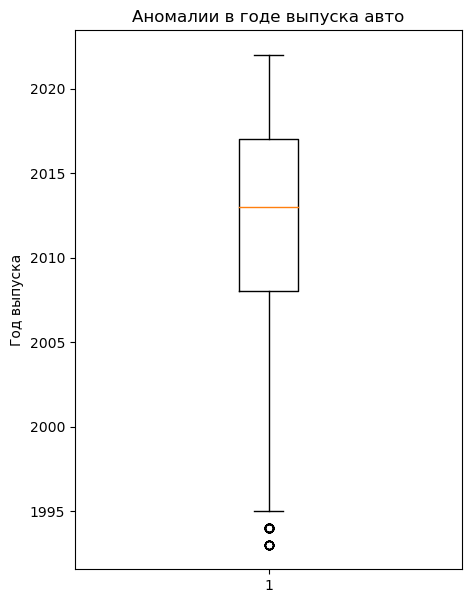

In [846]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(5,7))
#plt.figure(figsize=(5,15))
ax.boxplot(df_anoamalya['year'])
ax.set_ylabel('Год выпуска')
ax.set_title('Аномалии в годе выпуска авто')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Еще раз удалим выбросы

In [847]:
df_anoamalya = df_anoamalya[df_anoamalya['year'] >= calculate_outliers_3sigma(df_anoamalya.year)[0]]

И еще раз проверим год выпуска авто на предмет выбрасов.




Осталась проверить пробег - колонка "odometer"

In [848]:
calculate_outliers_3sigma(df_anoamalya.year)

(1996, 2029)

Главное - это вовремя остановиться. В базе остались автомобили 1995 года выпуска, но я думаю, что это не критичный выброс.

In [849]:
df_anoamalya.shape

(9093, 20)

In [850]:
df_anoamalya.describe()

,id,price,year,odometer,lat,long
count,9.093000e+03,9093.000000,9093.000000,9093.000000,9093.000000,9093.000000
mean,7.311529e+09,18986.205543,2012.392060,94506.638953,38.586953,-93.821281
std,4.378600e+06,13622.681136,5.550644,62985.759757,5.715836,17.746180
min,7.301586e+09,500.000000,1995.000000,0.000000,19.541726,-158.069300
25%,7.308105e+09,7900.000000,2008.000000,39902.000000,34.934438,-106.620000
50%,7.312745e+09,15990.000000,2013.000000,90000.000000,39.300000,-87.865100
75%,7.315280e+09,27990.000000,2017.000000,138361.000000,42.370000,-80.686200
max,7.317090e+09,74000.000000,2022.000000,283466.000000,64.947500,94.163200


In [851]:
calculate_outliers_3sigma(df_anoamalya.odometer)

(-94451, 283464)

In [852]:
df_anoamalya[df_anoamalya['odometer'] > calculate_outliers_3sigma(df_anoamalya.odometer)[1]].sort_values(by='odometer')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,283466,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
6809,7313373665,https://sanantonio.craigslist.org/cto/d/san-an...,san antonio,https://sanantonio.craigslist.org,15995,2008,ford,f-350 dually diesel 4x4,diesel,283466,clean,automatic,https://images.craigslist.org/00D0D_lhJJnmJfpi...,2008 Ford F-350 Crew Cab Dually Lariat Super D...,tx,29.649500,-98.613700,2021-04-27T11:28:59-0500,medium,2021-04-27 16:28:59+00:00
6760,7312674681,https://indianapolis.craigslist.org/cto/d/ande...,indianapolis,https://indianapolis.craigslist.org,950,2005,nissan,altima,gas,283466,clean,automatic,https://images.craigslist.org/00707_6rGv2wnfLg...,Great Spring time side project for a mechanic....,in,40.130900,-85.653600,2021-04-26T00:59:41-0400,low,2021-04-26 04:59:41+00:00
6756,7316252969,https://portland.craigslist.org/grg/cto/d/unde...,portland,https://portland.craigslist.org,12000,2009,chevrolet,silverado 2500 hd,gas,283466,clean,automatic,https://images.craigslist.org/00f0f_7AtEppWTdt...,Great condition Chevy 2500 was used as a lease...,or,45.671100,-121.539100,2021-05-03T09:24:07-0700,medium,2021-05-03 16:24:07+00:00
6643,7316810207,https://stlouis.craigslist.org/cto/d/saint-lou...,"st louis, MO",https://stlouis.craigslist.org,10000,2010,mercedes-benz,benz,diesel,283466,clean,automatic,https://images.craigslist.org/00R0R_3HDwz2JBwi...,Cargo Van does great at hauling cargo between ...,il,38.524400,-90.274500,2021-05-04T12:24:09-0500,medium,2021-05-04 17:24:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,7313545271,https://charleston.craigslist.org/cto/d/north-...,charleston,https://charleston.craigslist.org,22000,2012,other,Frtlner Cascadia,diesel,283466,clean,manual,https://images.craigslist.org/00303_eEnTeSi3C7...,I have a cascadia with Detroit DD15 engine and...,sc,32.853000,-79.991300,2021-04-27T17:13:19-0400,medium,2021-04-27 21:13:19+00:00
2236,7315948614,https://littlerock.craigslist.org/cto/d/little...,little rock,https://littlerock.craigslist.org,6000,2002,ford,f250,diesel,283466,clean,automatic,https://images.craigslist.org/00E0E_lt1oiyK429...,2003 Ford f250 one owner very very clean 7.3 d...,ar,34.765910,-92.338715,2021-05-02T16:47:04-0500,low,2021-05-02 21:47:04+00:00
1986,7313793455,https://columbiamo.craigslist.org/ctd/d/cuba-2...,columbia / jeff city,https://columbiamo.craigslist.org,3500,2004,honda,odyssey,gas,283466,clean,automatic,https://images.craigslist.org/00A0A_eNZzHMsbbi...,2004 Honda Odyssey 5dr EX - CALL 2004 - Honda...,mo,38.057080,-91.401701,2021-04-28T09:08:09-0500,low,2021-04-28 14:08:09+00:00
1849,7312946811,https://ventura.craigslist.org/cto/d/oxnard-20...,ventura county,https://ventura.craigslist.org,8500,2004,toyota,tacoma,gas,283466,clean,automatic,https://images.craigslist.org/00404_8uGW1bL4yk...,Vehicle is in great condition. Brakes and tire...,ca,34.171896,-119.229555,2021-04-26T11:42:52-0700,low,2021-04-26 18:42:52+00:00


In [853]:
calculate_outliers_3sigma(df_anoamalya.odometer)[1] * 100 /  283466

99.9992944480114

Максимальные пробег у автомобилей превышает верхнюю границу диапазона на 0,00071%
Можно считать, что по пробегу выбросов нет.

Проверим зависимость стоимости автомобиля от его года выпуска. 
Создадим датафреим, содержащий годом выпуска автомобиля и средрнюю стоимостью втомобиля за этот год.

In [854]:
year_price = df_anoamalya.groupby(['year']).agg({'price':'mean'})
year_price = year_price.rename(columns={'price':'price_mean'})
year_price.reset_index(inplace=True)
year_price

,year,price_mean
0,1995,9816.625000
1,1996,9362.960000
2,1997,6393.372093
3,1998,6666.313725
4,1999,7194.717949
5,2000,8416.090909
6,2001,7461.578947
7,2002,6834.655172
8,2003,7743.420455
9,2004,7893.769608


Построим диаграмму рассеяния для визуализации зависимости средрней стоимости от года выпуска автомобиля.

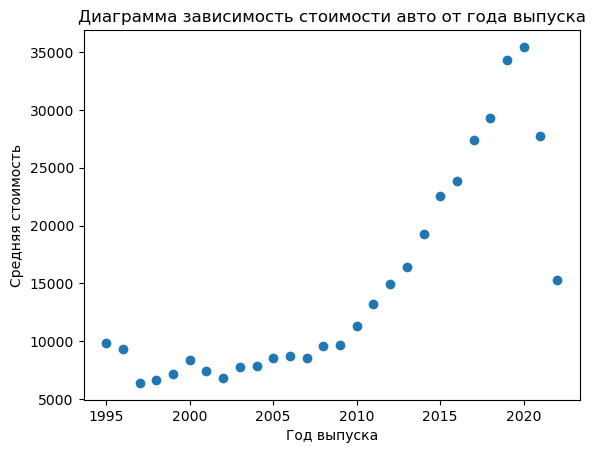

In [855]:
plt.scatter(year_price['year'], year_price['price_mean'])
plt.xlabel('Год выпуска')
plt.ylabel('Средняя стоимость')
plt.title('Диаграмма зависимость стоимости авто от года выпуска')
plt.show()

Прослеживается общая тенденция: чем старше автомобиль, тем стоимость его ниже. Но автомобили за 2021 и 2022 годы подозрительно дешево стоят. Проверим количество автомобилей по годам. Возможно, просто еще мало статистики набралось за  2021 и 2022 годы.

In [856]:
df_anoamalya.groupby(['year']).agg({'id':'count'})

,id
year,
1995,32
1996,25
1997,43
1998,51
1999,78
2000,77
2001,114
2002,145
2003,176


Автомобилей за 2021, 2022 года действительно не много. Данные по ним не репрезентативны. Удалим их.

In [857]:
df_anoamalya = df_anoamalya[df_anoamalya['year'] < 2021]

Еще раз построим график зависимости стоимости автомобиля от года выпуска.

In [858]:
year_price = df_anoamalya.groupby('year').agg({'price':'mean'})
year_price = year_price.rename(columns={'price':'price_mean'})
year_price.reset_index(inplace=True)
year_price

,year,price_mean
0,1995,9816.625000
1,1996,9362.960000
2,1997,6393.372093
3,1998,6666.313725
4,1999,7194.717949
5,2000,8416.090909
6,2001,7461.578947
7,2002,6834.655172
8,2003,7743.420455
9,2004,7893.769608


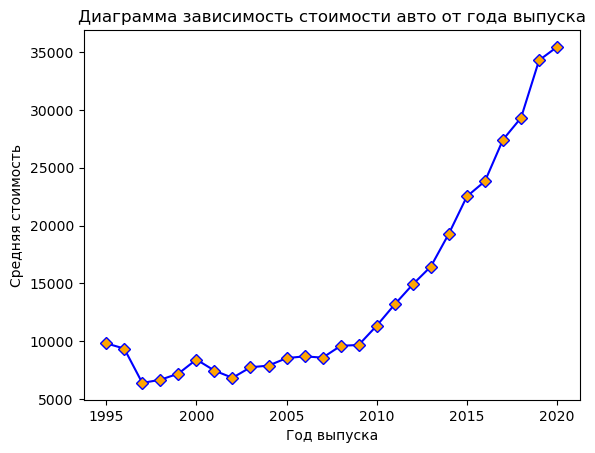

In [859]:
plt.figure()
plt.plot(year_price['year'], year_price['price_mean'], color='blue', marker='D', markerfacecolor='orange')
plt.xlabel('Год выпуска')
plt.ylabel('Средняя стоимость')
plt.title('Диаграмма зависимость стоимости авто от года выпуска')
plt.show()

Проверим коэффициент корреляции.

In [860]:
year_price['year'].corr(year_price['price_mean'])

0.8619876524644405

Опредененно существует сильная, прямая корреляция между годом выпуска и ценой автомобиля.

## Feature engineering

### Создание новых признаков

In [861]:
df_anoamalya.loc[:,('region','region_url','manufacturer','model','fuel','title_status','transmission','image_url','state')].describe()

,region,region_url,manufacturer,model,fuel,title_status,transmission,image_url,state
count,9052,9052,9052,9052,9052,9052,9052,9052,9052
unique,391,403,39,3061,5,6,3,8177,51
top,"kansas city, MO",https://kansascity.craigslist.org,ford,f-150,gas,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,ca
freq,82,82,1490,143,7641,8761,7011,188,992


In [862]:
df_anoamalya.loc[:,('region','region_url')]

,region,region_url
0,chattanooga,https://chattanooga.craigslist.org
2,reno / tahoe,https://reno.craigslist.org
3,fayetteville,https://fayetteville.craigslist.org
5,knoxville,https://knoxville.craigslist.org
6,des moines,https://desmoines.craigslist.org
...,...,...
9995,chautauqua,https://chautauqua.craigslist.org
9996,binghamton,https://binghamton.craigslist.org
9997,salem,https://salem.craigslist.org
9998,madison,https://madison.craigslist.org


Сравним колонки "region" и "region_url". Вероятно, название региона совпедает с доманном третьего уровня в region_url

In [863]:
df_feat = df_anoamalya.copy()

In [864]:
df_feat['region_new'] = df_feat.region_url.apply(lambda x: x.lower().split('://')[1].split('.')[0])

In [865]:
df_feat.region.nunique()

391

In [866]:
df_feat.region_new.nunique()

403

In [869]:
df_feat[df_feat['region'] != df_feat['region_new']].region.unique()

array(['reno / tahoe', 'des moines', 'grand rapids',
       'omaha / council bluffs', 'rhode island', 'hawaii',
       'fresno / madera', 'inland empire', 'south jersey', 'new haven',
       'ft myers / SW florida', 'tyler / east TX', 'corpus christi',
       'appleton-oshkosh-FDL', 'las vegas', 'greenville / upstate',
       'anchorage / mat-su', 'port huron', 'olympic peninsula',
       'san angelo', 'dallas / fort worth', 'SF bay area',
       'fort collins / north CO', 'st cloud', 'colorado springs',
       'yuba-sutter', 'san luis obispo', 'baton rouge', 'central NJ',
       'killeen / temple / ft hood', 'jersey shore',
       'kennewick-pasco-richland', 'western KY', 'kenai peninsula',
       'detroit metro', 'battle creek', 'st louis, MO',
       'dayton / springfield', 'kansas city, MO', 'orange county',
       'champaign urbana', 'show low', 'sarasota-bradenton',
       'tampa bay area', 'raleigh / durham / CH', 'seattle-tacoma',
       'new york city', 'gold country', 'fargo 

Возьмем от region только первую часть до символа '/', избавимся от пробелов и запишим в новую колонку

In [870]:
df_feat['region_corrected'] =  df_feat.region.apply(lambda x: x.split('/')[0].replace(' ', '').split('-')[0])

In [871]:
df_feat[df_feat['region_corrected'] != df_feat['region_new']].loc[0:,('region_corrected', 'region_new')]

,region_corrected,region_new
10,rhodeisland,providence
15,hawaii,honolulu
26,ftmyers,fortmyers
27,tyler,easttexas
47,olympicpeninsula,olympic
...,...,...
9966,rhodeisland,providence
9976,southeastalaska,juneau
9987,rochester,rmn
9992,centralNJ,cnj


In [872]:
df_feat.region_corrected.nunique()

387

In [873]:
df_feat.region_new.nunique()

403

Несовпадоют назнания в 2075 записях. Это много, но что-то исправить уже не получится. Оставим пока обе колонки. Уникальных значений в обоих колонках не так много. Это хорошо - будет не так много колонок на этапе OneHotEncoder.

Колонки manufacturer, model можно попробывать объеденить, чтобы получить идентификатор модели.  

In [874]:
df_feat['model'].nunique()

3061

Очень большое разнообразие моделей. Может в дальнейшем не хватить оперативной памяти для обработки массива данных. Возьмем только первое слово от модели

In [875]:
df_feat['short_model'] = df_feat.model.apply(lambda x: x.split(' ')[0])

In [876]:
df_feat.short_model.nunique()

816

In [877]:
df_feat['manufacturer'].nunique()

39

In [878]:
df_feat['manufacturer_model'] = df_feat.manufacturer + ': ' + df_feat.short_model

In [879]:
df_feat.manufacturer_model.nunique()

866

In [880]:
df_feat.manufacturer_model


0              ram: 2500
2       volkswagen: golf
3           toyota: rav4
5                 bmw: 1
6           ford: fusion
              ...       
9995        toyota: rav4
9996      jeep: wrangler
9997            audi: a3
9998    porsche: cayenne
9999           ram: 1500
Name: manufacturer_model, Length: 9052, dtype: object

Поработаем с длинной сообщения (поле description)

In [881]:
df_feat['desc_len'] = df_feat.apply(lambda x: len(x.description) , axis=1)
df_feat['desc_len']

0       4482
2       4286
3       3241
5       4851
6        344
        ... 
9995    1710
9996     948
9997     909
9998    3644
9999    4483
Name: desc_len, Length: 9052, dtype: int64

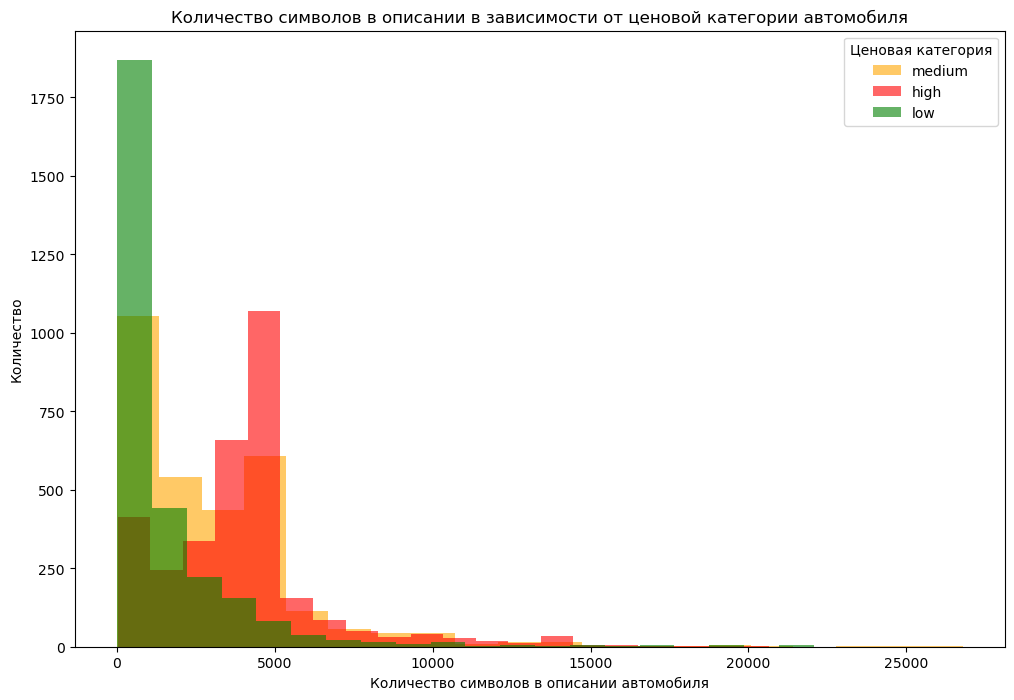

In [882]:
colors = {'medium': 'orange', 'high': 'red', 'low': 'green',}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_feat[df_feat['price_category'] == price_category]

    ax.hist(data['desc_len'], color=color, alpha=0.6, bins=20)
    
plt.ylabel('Количество')
plt.xlabel('Количество символов в описании автомобиля')
plt.title('Количество символов в описании в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

Из графика видно, что дорогие авто чаще имеют более длинное описание, чем бюджетные машины, но как правило не более 5000 символов.

Год выпуска автомобиля. 

Создадим категориальный признак, указывающий на возраст авто:
new — автомобиль позже 2014 года выпуска;
average— автомобиль, выпущенный между 2006 и 2013 годом;
old — автомобиль старше 2006 года выпуска.

In [883]:
df_feat['year'].value_counts().sort_index()

year
1995     32
1996     25
1997     43
1998     51
1999     78
2000     77
2001    114
2002    145
2003    176
2004    204
2005    244
2006    271
2007    379
2008    438
2009    279
2010    334
2011    460
2012    559
2013    661
2014    624
2015    639
2016    705
2017    780
2018    777
2019    563
2020    394
Name: count, dtype: int64

In [884]:
df_feat['age_category'] = df_feat.year.apply(lambda x: 'new' if x >= 2014 else ('average' if x < 2014 and x >= 2006 else 'old'))


In [885]:
df_feat.loc[:,('year','age_category')]

,year,age_category
0,2020,new
2,2017,new
3,2013,average
5,2012,average
6,2015,new
...,...,...
9995,2002,old
9996,2008,average
9997,2011,average
9998,2015,new


In [886]:
df_feat.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,long,posting_date,price_category,date,region_new,region_corrected,short_model,manufacturer_model,desc_len,age_category
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,chattanooga,chattanooga,2500,ram: 2500,4482,new
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,reno,reno,golf,volkswagen: golf,4286,new
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,fayetteville,fayetteville,rav4,toyota: rav4,3241,average
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,-83.940000,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,knoxville,knoxville,1,bmw: 1,4851,average
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,-93.735800,2021-05-04T11:59:42-0500,low,2021-05-04 16:59:42+00:00,desmoines,desmoines,fusion,ford: fusion,344,new


### Преобразование категориальных переменных

In [887]:
df_feat.fuel.unique()

array(['diesel', 'gas', 'other', 'electric', 'hybrid'], dtype=object)

In [888]:
ohe = OneHotEncoder(sparse_output=False)

In [889]:
ohe.fit(df_feat[['fuel']])

OneHotEncoder(sparse_output=False)

In [890]:
ohe_fuel = ohe.transform(df_feat[['fuel']])
ohe_fuel

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]])

In [891]:
ohe_fuel.shape

(9052, 5)

In [892]:
ohe.inverse_transform(ohe_fuel)

array([['diesel'],
       ['gas'],
       ['gas'],
       ...,
       ['gas'],
       ['hybrid'],
       ['gas']], dtype=object)

In [893]:
ohe.categories_

[array(['diesel', 'electric', 'gas', 'hybrid', 'other'], dtype=object)]

In [894]:
ohe.get_feature_names_out()

array(['fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_other'], dtype=object)

In [895]:
df_feat[ohe.get_feature_names_out()] = ohe_fuel

In [896]:
df_feat.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,region_corrected,short_model,manufacturer_model,desc_len,age_category,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,chattanooga,2500,ram: 2500,4482,new,1.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,reno,golf,volkswagen: golf,4286,new,0.0,0.0,1.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,fayetteville,rav4,toyota: rav4,3241,average,0.0,0.0,1.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,knoxville,1,bmw: 1,4851,average,0.0,0.0,0.0,0.0,1.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,desmoines,fusion,ford: fusion,344,new,0.0,0.0,1.0,0.0,0.0


In [897]:
df_feat.region_new.nunique()

403

In [898]:
df_feat.region_corrected.nunique()

387

Поля region и region_url по сути своей означают одно и тоже - регион, где продается автомобиль. Но поскольку нам не удалось установить четкого соответствия между названием региона и полем url, добавим оба этих поля в виде ohe-hot матрицы.

In [900]:
ohe.fit(df_feat[['region_new']])

OneHotEncoder(sparse_output=False)

In [901]:
ohe_region_new = ohe.transform(df_feat[['region_new']])
ohe_region_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [902]:
ohe_region_new.shape

(9052, 403)

In [904]:
df_feat[ohe.get_feature_names_out()] = ohe_region_new

In [905]:
df_feat.shape

(9052, 434)

In [906]:
df_feat.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,region_new_winchester,region_new_winstonsalem,region_new_worcester,region_new_wyoming,region_new_yakima,region_new_york,region_new_youngstown,region_new_yubasutter,region_new_yuma,region_new_zanesville
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [907]:
ohe.fit(df_feat[['region_corrected']])

OneHotEncoder(sparse_output=False)

In [908]:
ohe_region_corrected = ohe.transform(df_feat[['region_corrected']])

In [909]:
ohe_region_corrected

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [910]:
ohe_region_corrected.shape

(9052, 387)

In [912]:
df_feat[ohe.get_feature_names_out()] = ohe_region_corrected

In [682]:
df_feat.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,region_corrected_winchester,region_corrected_winston,region_corrected_worcester,region_corrected_wyoming,region_corrected_yakima,region_corrected_york,region_corrected_youngstown,region_corrected_yuba,region_corrected_yuma,region_corrected_zanesville
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [683]:
ohe.fit(df_feat[['manufacturer_model']])

OneHotEncoder(sparse_output=False)

In [684]:
ohe_manufacturer_model = ohe.transform(df_feat[['manufacturer_model']])

In [685]:
ohe_manufacturer_model.shape

(9052, 3085)

In [688]:
df_feat[ohe.get_feature_names_out()] = ohe_manufacturer_model
df_feat.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model_volvo: xc60 3.2 sport utility 4d,manufacturer_model_volvo: xc60 t5 drive-e premier,manufacturer_model_volvo: xc60 t5 inscription sport,manufacturer_model_volvo: xc60 t5 premier sport,manufacturer_model_volvo: xc60 t6 inscription sport,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc70 awd,manufacturer_model_volvo: xc90,manufacturer_model_volvo: xc90 awd,manufacturer_model_volvo: xc90 t6 r design awd gas
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [689]:
df_feat.loc[:, ('title_status','transmission')]

,title_status,transmission
0,clean,other
2,clean,other
3,clean,automatic
5,clean,other
6,clean,automatic
...,...,...
9995,clean,automatic
9996,clean,other
9997,clean,automatic
9998,clean,automatic


In [690]:
df_feat.title_status.value_counts()

title_status
clean         8761
rebuilt        163
salvage         88
lien            32
missing          6
parts only       2
Name: count, dtype: int64

In [691]:
df_feat.transmission.value_counts()

transmission
automatic    7011
other        1588
manual        453
Name: count, dtype: int64

In [916]:
ohe.fit(df_feat[['title_status', 'transmission']])

OneHotEncoder(sparse_output=False)

In [917]:
ohe_status = ohe.transform(df_feat[['title_status', 'transmission']])

In [918]:
ohe_status

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [920]:
df_feat[ohe.get_feature_names_out()] = ohe_status

In [921]:
df_feat.state.nunique()

51

In [922]:
ohe.fit(df_feat[['state']])

OneHotEncoder(sparse_output=False)

In [923]:
ohe_state = ohe.transform(df_feat[['state']])

In [925]:
df_feat[ohe.get_feature_names_out()] = ohe_state

In [926]:
df_feat.shape

(9052, 881)

In [933]:
df_feat.manufacturer_model.nunique()

866

In [932]:
ohe.fit(df_feat[['manufacturer_model']])

OneHotEncoder(sparse_output=False)

In [934]:
ohe_state = ohe.transform(df_feat[['manufacturer_model']])

In [937]:
df_feat[ohe.get_feature_names_out()] = ohe_state

In [938]:
df_feat.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model_volvo: tractor,manufacturer_model_volvo: v50,manufacturer_model_volvo: v60,manufacturer_model_volvo: v90,manufacturer_model_volvo: vnl,manufacturer_model_volvo: xc,manufacturer_model_volvo: xc40,manufacturer_model_volvo: xc60,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc90
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,6700,2015,ford,fusion se,gas,149000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [939]:
df_feat.to_csv('data\df_feat.csv', index=False)

### Нормализация данных

In [940]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [941]:
std_scaler.fit(df[['price','year','odometer','lat','long']])

StandardScaler()

In [942]:
print(std_scaler.mean_)
print(std_scaler.var_)

[ 1.93825546e+04  2.01102388e+03  9.35708148e+04  3.85929267e+01
 -9.39577228e+01]
[3.35898571e+08 8.96145556e+01 3.99922340e+09 3.40726264e+01
 3.25001007e+02]


In [943]:
std_sc = std_scaler.transform(df_feat[['price','year','odometer','lat','long']])
std_sc

array([[ 1.94283867,  0.94819904, -1.04568988, -0.60524585,  0.4830168 ],
       [ 0.88432212,  0.63129193, -1.25748818, -0.82466461,  0.52951109],
       [-0.26640541,  0.20874913,  0.37508547, -0.49287062,  0.84882415],
       ...,
       [-0.56677312, -0.00252228,  0.89521996,  1.0849392 , -1.6100165 ],
       [ 0.68298572,  0.42002053, -0.50012821,  0.76006482,  0.25293884],
       [ 0.68789637,  0.63129193, -0.91161211, -0.32942755,  0.97947271]])

In [944]:
std_scaler.get_feature_names_out()

array(['price', 'year', 'odometer', 'lat', 'long'], dtype=object)

In [945]:
df_sc = df_feat.copy() 

In [946]:
df_sc[std_scaler.get_feature_names_out()] = std_sc

In [947]:
df_sc.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,manufacturer_model_volvo: tractor,manufacturer_model_volvo: v50,manufacturer_model_volvo: v60,manufacturer_model_volvo: v90,manufacturer_model_volvo: vnl,manufacturer_model_volvo: xc,manufacturer_model_volvo: xc40,manufacturer_model_volvo: xc60,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc90
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,1.942839,0.948199,ram,2500 crew cab big horn,diesel,-1.045690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,0.884322,0.631292,volkswagen,golf r hatchback,gas,-1.257488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,-0.266405,0.208749,toyota,rav4,gas,0.375085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,-0.261495,0.103113,bmw,1 series 128i coupe 2d,other,-0.207241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7316793777,https://desmoines.craigslist.org/ctd/d/martens...,des moines,https://desmoines.craigslist.org,-0.691995,0.420021,ford,fusion se,gas,0.876497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [948]:
df_sc.to_csv('data\df_sc', index=False)

Извлечем из поля date месяц и день (год там везде 2021) и нормализуем их 

In [949]:
df_sc = pd.read_csv('data\df_sc')
df_sc.date

0       2021-04-17 16:30:50+00:00
1       2021-04-28 10:52:20+00:00
2       2021-04-17 14:08:57+00:00
3       2021-04-08 19:10:56+00:00
4       2021-05-04 16:59:42+00:00
                  ...            
9047    2021-04-10 20:33:57+00:00
9048    2021-05-03 13:36:30+00:00
9049    2021-04-22 19:14:01+00:00
9050    2021-04-14 14:14:42+00:00
9051    2021-04-24 17:50:49+00:00
Name: date, Length: 9052, dtype: object

In [951]:

df_sc['date'] = pd.to_datetime(df_sc['posting_date'], utc=True)

In [952]:
day = []

for i in range(len(df_sc)):
    day.append([df_sc.date[i].day, df_sc.date[i].month])
df_sc[['date_day','date_month']] = day

In [953]:
df_sc[['date_day','date_month']]

,date_day,date_month
0,17,4
1,28,4
2,17,4
3,8,4
4,4,5
...,...,...
9047,10,4
9048,3,5
9049,22,4
9050,14,4


In [954]:
std_scaler.fit(df_sc[['date_day','date_month']])

StandardScaler()

In [955]:
std_sc = std_scaler.transform(df_sc[['date_day','date_month']])
std_sc

array([[ 0.17303755, -0.61310113],
       [ 1.25953618, -0.61310113],
       [ 0.17303755, -0.61310113],
       ...,
       [ 0.66690056, -0.61310113],
       [-0.12328025, -0.61310113],
       [ 0.86444577, -0.61310113]])

In [956]:
std_scaler.get_feature_names_out()

array(['date_day', 'date_month'], dtype=object)

In [957]:
df_sc[std_scaler.get_feature_names_out()] = std_sc

In [958]:
df_sc[['date_day','date_month']]

,date_day,date_month
0,0.173038,-0.613101
1,1.259536,-0.613101
2,0.173038,-0.613101
3,-0.715916,-0.613101
4,-1.111006,1.631052
...,...,...
9047,-0.518371,-0.613101
9048,-1.209779,1.631052
9049,0.666901,-0.613101
9050,-0.123280,-0.613101


Удаление не информативных колонок

In [959]:
df_sc.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer',
       ...
       'manufacturer_model_volvo: v60', 'manufacturer_model_volvo: v90',
       'manufacturer_model_volvo: vnl', 'manufacturer_model_volvo: xc',
       'manufacturer_model_volvo: xc40', 'manufacturer_model_volvo: xc60',
       'manufacturer_model_volvo: xc70', 'manufacturer_model_volvo: xc90',
       'date_day', 'date_month'],
      dtype='object', length=1749)

In [960]:
df_final = df_sc.copy()


In [961]:
df_final = df_final.drop(['id', 'url', 'region', 'region_url', 'manufacturer', 'model', 'fuel'], axis=1)

In [962]:
df_final = df_final.drop(['title_status','transmission','image_url','description','state'], axis=1)

Забыл нормализовать price_category

In [963]:
df_final['price_category_norm'] = df_final.price_category.apply(lambda x: 0 if x == 'low' else ( 1 if x == 'medium' else 2)) 

In [964]:
df_final.loc[:,['price_category_norm', 'price_category']]

,price_category_norm,price_category
0,2,high
1,2,high
2,1,medium
3,1,medium
4,0,low
...,...,...
9047,0,low
9048,1,medium
9049,0,low
9050,2,high


In [965]:
df_final = df_final.drop(['price', 'posting_date','price_category','date','region_new','region_corrected'], axis=1)


Нормализация desc_len

In [966]:
std_scaler.fit(df_final[['desc_len']])

StandardScaler()

In [967]:
std_sc = std_scaler.transform(df_final[['desc_len']])

In [968]:
std_sc

array([[ 0.59198074],
       [ 0.52165439],
       [ 0.14670014],
       ...,
       [-0.69003986],
       [ 0.29129972],
       [ 0.59233954]])

In [969]:
df_final['desc_len'] = std_sc

Подготовим категориальную переменную age_category

In [970]:
ohe.fit(df_feat[['age_category']])


OneHotEncoder(sparse_output=False)

In [971]:
ohe_state = ohe.transform(df_feat[['age_category']])

In [972]:
ohe_state

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [973]:
ohe.get_feature_names_out()

array(['age_category_average', 'age_category_new', 'age_category_old'],
      dtype=object)

In [974]:
df_final[ohe.get_feature_names_out()] =  ohe_state

In [ ]:
df_final = df_final.drop(['manufacturer_model','age_category'], axis=1)

In [980]:
df_final

,year,odometer,lat,long,short_model,desc_len,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,...,manufacturer_model_volvo: xc40,manufacturer_model_volvo: xc60,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc90,date_day,date_month,price_category_norm,age_category_average,age_category_new,age_category_old
0,0.948199,-1.045690,-0.605246,0.483017,2500,0.591981,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,2,0.0,1.0,0.0
1,0.631292,-1.257488,-0.824665,0.529511,golf,0.521654,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.259536,-0.613101,2,0.0,1.0,0.0
2,0.208749,0.375085,-0.492871,0.848824,rav4,0.146700,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,1,1.0,0.0,0.0
3,0.103113,-0.207241,-0.449349,0.555682,1,0.724381,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.715916,-0.613101,1,1.0,0.0,0.0
4,0.420021,0.876497,0.476270,0.012310,fusion,-0.892766,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.111006,1.631052,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,-0.953244,0.892310,0.604911,0.819192,rav4,-0.402635,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.518371,-0.613101,0,0.0,0.0,1.0
9048,-0.319429,0.316293,0.792175,0.898730,wrangler,-0.676046,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-1.209779,1.631052,1,1.0,0.0,0.0
9049,-0.002522,0.895220,1.084939,-1.610017,a3,-0.690040,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.666901,-0.613101,0,1.0,0.0,0.0
9050,0.420021,-0.500128,0.760065,0.252939,cayenne,0.291300,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.123280,-0.613101,2,0.0,1.0,0.0


In [981]:
df_final = df_final.drop(['short_model'], axis=1)


In [982]:
df_final

,year,odometer,lat,long,desc_len,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,manufacturer_model_volvo: xc40,manufacturer_model_volvo: xc60,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc90,date_day,date_month,price_category_norm,age_category_average,age_category_new,age_category_old
0,0.948199,-1.045690,-0.605246,0.483017,0.591981,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,2,0.0,1.0,0.0
1,0.631292,-1.257488,-0.824665,0.529511,0.521654,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.259536,-0.613101,2,0.0,1.0,0.0
2,0.208749,0.375085,-0.492871,0.848824,0.146700,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,1,1.0,0.0,0.0
3,0.103113,-0.207241,-0.449349,0.555682,0.724381,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.715916,-0.613101,1,1.0,0.0,0.0
4,0.420021,0.876497,0.476270,0.012310,-0.892766,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.111006,1.631052,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,-0.953244,0.892310,0.604911,0.819192,-0.402635,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.518371,-0.613101,0,0.0,0.0,1.0
9048,-0.319429,0.316293,0.792175,0.898730,-0.676046,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.209779,1.631052,1,1.0,0.0,0.0
9049,-0.002522,0.895220,1.084939,-1.610017,-0.690040,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666901,-0.613101,0,1.0,0.0,0.0
9050,0.420021,-0.500128,0.760065,0.252939,0.291300,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.123280,-0.613101,2,0.0,1.0,0.0


In [983]:
df_final.to_csv('data\df_final.csv', index='False')

## Modelling

In [8]:
df = pd.read_csv('data\df_final.csv', )

In [123]:
df

,year,odometer,lat,long,desc_len,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,...,manufacturer_model_volvo: xc40,manufacturer_model_volvo: xc60,manufacturer_model_volvo: xc70,manufacturer_model_volvo: xc90,date_day,date_month,price_category,age_category_average,age_category_new,age_category_old
0,0.948199,-1.045690,-0.605246,0.483017,0.591981,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,2,0.0,1.0,0.0
1,0.631292,-1.257488,-0.824665,0.529511,0.521654,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.259536,-0.613101,2,0.0,1.0,0.0
2,0.208749,0.375085,-0.492871,0.848824,0.146700,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.173038,-0.613101,1,1.0,0.0,0.0
3,0.103113,-0.207241,-0.449349,0.555682,0.724381,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,-0.715916,-0.613101,1,1.0,0.0,0.0
4,0.420021,0.876497,0.476270,0.012310,-0.892766,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.111006,1.631052,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,-0.953244,0.892310,0.604911,0.819192,-0.402635,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.518371,-0.613101,0,0.0,0.0,1.0
9048,-0.319429,0.316293,0.792175,0.898730,-0.676046,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.209779,1.631052,1,1.0,0.0,0.0
9049,-0.002522,0.895220,1.084939,-1.610017,-0.690040,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.666901,-0.613101,0,1.0,0.0,0.0
9050,0.420021,-0.500128,0.760065,0.252939,0.291300,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.123280,-0.613101,2,0.0,1.0,0.0


In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df = df.drop(['Unnamed: 0'], axis=1)


In [12]:
df = df.rename(mapper={'price_category_norm':'price_category'}, axis=1)

In [13]:
df.price_category.dtype

dtype('int64')

In [14]:
df.price_category.value_counts()

price_category
2    3195
1    2956
0    2901
Name: count, dtype: int64

Значения у целевой переменной распределены равномерно.

In [15]:
x = df.drop(['price_category'], axis=1)
y = df.price_category

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape

((6336, 1731), (2716, 1731))

### Логистическая регрессия

In [17]:
logreg = LogisticRegression(random_state=42)

In [18]:
logreg.fit(x_train, y_train)


C:\Users\odik\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [19]:
pred_logreg = logreg.predict(x_test)
accuracy_score(y_test, pred_logreg)

0.78240058910162

In [20]:
confusion_matrix(y_test, pred_logreg)

array([[685, 124,  23],
       [169, 606, 131],
       [ 12, 132, 834]], dtype=int64)

#### Попробуем улучшить модель

In [31]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [87]:
logreg_tuned = LogisticRegression(penalty='l1', solver='saga', max_iter = 1000, random_state=42)

In [88]:
logreg_tuned.fit(x_train, y_train)

C:\Users\odik\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [92]:
pred_logreg_tuned = logreg_tuned.predict(x_test)
accuracy_score(pred_logreg_tuned, y_test)

0.8019145802650958

In [90]:
pred_logreg_tuned = logreg_tuned.predict(x_train)
accuracy_score(pred_logreg_tuned, y_train)

0.8589015151515151

Модель выдает предупреждение о достижении максимального значения параметра max_iter. При увеличении значения max_iter со 100 до 1000 ошибка не пропала, но качество модени улучшилось примерно на 0.8%. Однако и время обучения модели заметно выросло. Распознавание на тренировачных данных тоже улучшилось примерно на 2%.

#### Кросс-валидация

In [93]:
cross_val_score(logreg_tuned, x, y, cv=4)

C:\Users\odik\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\odik\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\odik\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.78921785, 0.80114892, 0.7971719 , 0.79849757])

In [100]:
result = pd.DataFrame([0.78921785, 0.80114892, 0.7971719 , 0.79849757])
result.mean() , result.std()

(0    0.796509
 dtype: float64,
 0    0.005134
 dtype: float64)

Отклонение небольшое. Значит модель не переобучилась.

### Случайный лес

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
pred_rf = rf.predict(x_test)

In [24]:
accuracy_score(y_test, pred_rf)

0.7345360824742269

In [25]:
confusion_matrix(y_test, pred_rf)

array([[690, 119,  23],
       [228, 497, 181],
       [ 26, 144, 808]], dtype=int64)

#### Попробуем улучшить модель

In [59]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Поиск по сетке

In [60]:
# Инициализируем сетку параметров для перебора
param_grid = {
    'n_estimators': list(range(100, 501, 100)),
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': list(range(1, 10))
}

In [61]:
from sklearn.model_selection import GridSearchCV

# Инициализируем базовую модель
rf = RandomForestClassifier(random_state=42)

# Модель для перебора параметров базовой модели
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

In [62]:
# Выполняем перебор параметров
grid_search_rf.fit(x_train, y_train)

# Выводим лучшие параметры
best_params = grid_search_rf.best_params_
best_params

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}

In [63]:
rf_tuned =  RandomForestClassifier(random_state=42, max_features='sqrt', min_samples_leaf=1, n_estimators=500)

In [64]:
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [106]:
pred_rf_tuned = rf_tuned.predict(x_test)
accuracy_score(pred_rf_tuned, y_test)

0.7426362297496318

In [77]:
pred_rf_tuned = rf_tuned.predict(x_train)
accuracy_score(pred_rf_tuned, y_train)

1.0

#### Кросс-валидация

In [102]:
rf_score = cross_val_score(rf_tuned, x, y, cv=4)

In [107]:
rf_score

array([0.76005303, 0.75563411, 0.75695979, 0.74591251])

In [108]:

rf_score.mean(), rf_score.std()

(0.7546398585947858, 0.005287714513377968)

Разброс небольшщй. Значит модель не переобучилась. Среднее значение метрики даже выше, чем при разбиении данных с использованием модуля train_test_split

### Многослойный персептрон

In [26]:
mlp = MLPClassifier()

In [27]:
mlp.fit(x_train, y_train)

MLPClassifier()

In [28]:
pred_mlp = mlp.predict(x_test)

In [29]:
accuracy_score(pred_mlp, y_test)

0.7709867452135494

In [76]:
pred_mlp = mlp.predict(x_train)
accuracy_score(pred_mlp, y_train)

1.0

In [30]:
confusion_matrix(pred_mlp, y_test)

array([[657, 176,  16],
       [153, 608, 133],
       [ 22, 122, 829]], dtype=int64)

#### Попробуем улучшить модель

In [67]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [73]:
#mlp_tuned = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,20), activation = 'tanh') # 0.773564064801178
mlp_tuned = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(1000,200), activation = 'tanh')

In [74]:
mlp_tuned.fit(x_train, y_train)
pred_mlp_tuned = mlp_tuned.predict(x_test)
accuracy_score(pred_mlp_tuned, y_test)

0.7853460972017673

In [75]:
pred_mlp_tuned = mlp_tuned.predict(x_train)
accuracy_score(pred_mlp_tuned, y_train)

0.9990530303030303

#### Кросс-валидация

In [109]:
mlp_score = cross_val_score(mlp_tuned, x, y, cv=4)

In [110]:
mlp_score

array([0.78524083, 0.77419355, 0.78303137, 0.78214759])

In [112]:
mlp_score.mean(), mlp_score.std()

(0.7811533362792753, 0.004173183112577134)

Разброс небольшщй. Значит модель не переобучилась.

### По результатам тюнинга и кросс-валидации победила модель логистической регресии!

Расчитаем на всей выборке значение метрики для тюнингованной модели логистической регресии.

In [116]:
final_logreg_tuned = logreg_tuned.predict(x)
accuracy_score(final_logreg_tuned, y)

0.8418029164825453

In [117]:
confusion_matrix(final_logreg_tuned, y)

array([[2548,  420,   28],
       [ 307, 2218,  313],
       [  46,  318, 2854]], dtype=int64)

На всей выборке значение метрики оказалось выше на 4%, чем на тестовой выборке и на кросс-валидации. Отличный результат!

## Results

По итогам тестирования, тюнинга и кросс-валидации наилучшие результаты показала модель логистической регресии, второе место - за многослойным перцептроном.

Модель прошла обучение на всем датасете в предыдущем разделе.

In [118]:
filename = "model.pickle"
with open(filename, 'wb') as file:
    pickle.dump(logreg_tuned, file)

In [120]:
with open(filename, 'rb') as f:
    model = pickle.load(f)

In [121]:
model

LogisticRegression(max_iter=1000, penalty='l1', random_state=42, solver='saga')

In [127]:
row = df.sample(1)
row_x = row.drop(['price_category'],axis=1)
row_y = row['price_category']

In [130]:
model.predict(row_x)

array([0], dtype=int64)

In [131]:
row_y

42    0
Name: price_category, dtype: int64